In [1]:
from google.colab import files
uploaded = files.upload()

Saving uber.csv to uber.csv


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [7]:
df.dropna(axis = 0, inplace = True)

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [10]:
### Claculating the distance between the pickup and drop co-ordinates
### Using haversine formula for accuracy

def haversine(lon_1, lon_2, lat_1, lat_2):
  lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2]) #Degree to radians
  diff_lon = lon_2 - lon_1
  diff_lat = lat_2 - lat_1
  km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon / 2.0)**2))

  return km

In [11]:
### Find distance travelled per ride
df['Distance'] = haversine(df['pickup_longitude'], df['dropoff_longitude'], df['pickup_latitude'], df['dropoff_latitude'])
### Round it to 2 decimal point
df['Distance'] = df['Distance'].astype(float).round(2)

In [12]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'Fare_amount')

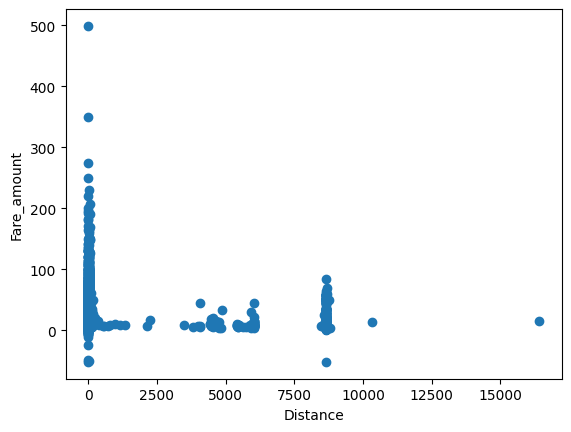

In [13]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare_amount")

In [14]:
### Outliers
### We can get rid of the trips with very large distances that are outlers
### As well as the trips with 0 distances

df.drop(df[df['Distance'] > 60] .index , inplace = True)
df.drop(df[df['Distance'] == 0] .index , inplace = True)
df.drop(df[df['fare_amount'] == 0] .index , inplace = True)
df.drop(df[df['fare_amount'] < 0] .index , inplace = True)

In [15]:
df.shape

(193490, 10)

In [16]:
### Removing rows with nonplausible fare amount and distance travelled
df.drop(df[(df['fare_amount'] > 100) & (df['Distance'] < 1)] .index , inplace = True)
df.drop(df[(df['fare_amount'] < 100) & (df['Distance'] > 100)] .index , inplace = True)

In [17]:
df.shape

(193481, 10)

Text(0, 0.5, 'fare_amount')

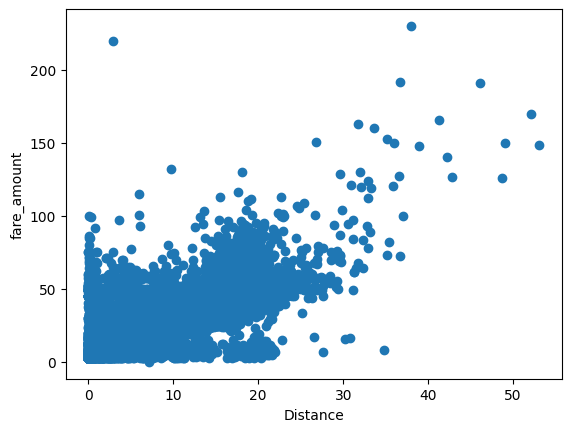

In [18]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [19]:
### Create new dataframe of specific column
df2 = pd.DataFrame().assign(fare = df['fare_amount'], Distance = df['Distance'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193481 non-null  float64
 1   Distance  193481 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


In [20]:
df2.shape

(193481, 2)

In [21]:
### Independant variable
x = df2['fare'].values.reshape(-1,1)
### Dependant Variable
y = df2 ['Distance'].values.reshape(-1,1)

In [22]:
### Scale by standard scalar
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
x_std = std.fit_transform(x)

In [23]:
y_std

array([[-0.46599576],
       [-0.24929862],
       [ 0.46746884],
       ...,
       [ 2.63721838],
       [ 0.05074357],
       [ 0.57303924]])

In [24]:
x_std

array([[-0.4011162 ],
       [-0.38006651],
       [ 0.16722527],
       ...,
       [ 2.06169682],
       [ 0.33562274],
       [ 0.29352337]])

In [25]:
### Split in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [26]:
### Simple linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)

LinearRegression()

In [28]:
### Predict the tesst values
y_pred = l_reg.predict(X_test)

In [29]:
from sklearn import metrics
print('MAE:' , metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:' , metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R2:' , metrics.r2_score(Y_test, y_pred))

MAE: 0.24827770698546553
MSE: 0.19689551679683756
RMSE: 0.44372910294101464
R2: 0.8006427045110035


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
rfrmodel.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()